<a href="https://colab.research.google.com/github/LeyloJohnny/Computational-Neuroscience/blob/main/cross_validation_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HMM Analysis

### Access and understand data

Get data files:

In [1]:
#get data from google drive
!gdown --id 1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
#unzip data
!unzip 'NewData.zip'

Downloading...
From: https://drive.google.com/uc?id=1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
To: /content/NewData.zip
127MB [00:01, 92.4MB/s]
Archive:  NewData.zip
  inflating: Cluster.pkl             
  inflating: BN.pkl                  
  inflating: SFA.pkl                 


Get a list of data for all three models:

In [2]:
import pickle

#create a list of model name strings
models = ['BN.pkl', "SFA.pkl", "Cluster.pkl"]

#create a list of model names
model_names = ["Balanced Network", "Clustered with SFA", "Clustered wo SFA"]

#create lists to store model data
models_x = []
models_y = []

#for all models
for i in range(len(models)):

  #open pickle file
  with open(models[i], 'rb') as f:
    #get x (actual data: time * neuron id)
    x = pickle.load(f)
    #get y (information on data, such as inhibitory/excitatory neurons, clusters, etc.)
    y = pickle.load(f)
    #add x and y to the models lists
    models_x.append(x)
    models_y.append(y)

###Extract certain time range

In [88]:
import numpy as np
import pandas as pd

time_range_models = []

time_range = 300000

for model in range(len(models)):
  #set condition: returns True for time <= 5 s
  condition = [True if i <= time_range else False for i in models_x[model][0]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, models_x[model][0])
  new_y = np.extract(condition, models_x[model][1])

  new = [new_x, new_y]

  time_range_models.append(new)

### Create raster plots from data for one cluster

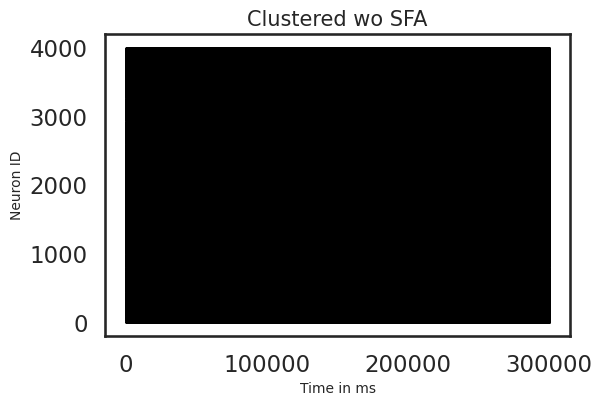

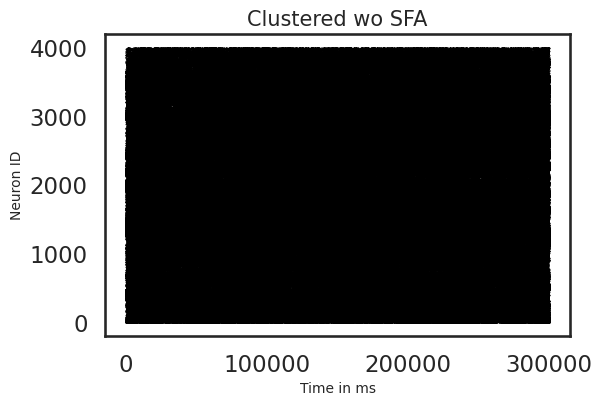

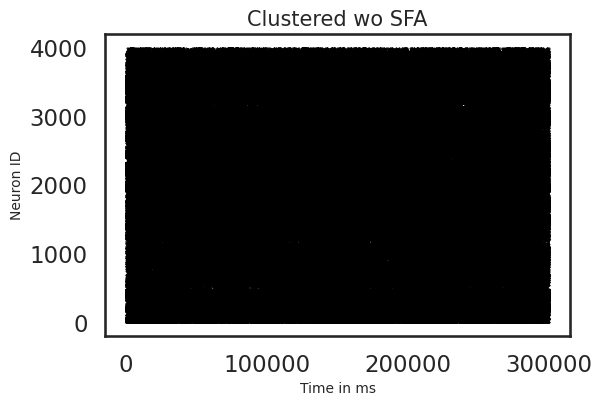

In [89]:
import matplotlib.pyplot as plt

one_cluster = []

neuron_ID = 0

for model in range(len(models)):

  condition = [True if i > neuron_ID and i <= neuron_ID+4000 else False for i in time_range_models[model][1]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, time_range_models[model][0])
  new_y = np.extract(condition, time_range_models[model][1])

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(new_x,new_y,'.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[i], fontsize = 15)

  new = [new_x, new_y]

  one_cluster.append(new)

###Spike count matrix with cluster average:

In [90]:
import numpy as np
import matplotlib.pyplot as plt

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(time_range_models[i][0]+ 1)/window)

#define which neurons to focus on (here: only excitatory neurons 0 - 4000)
Nneurons = int(np.max(time_range_models[i][1])+1) - 1000

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix_average = np.zeros((len(models), intervals, Nneurons))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(time_range_models[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, Nneurons))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(Nneurons):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == k)

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix_average[i] = spike_counts

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix_average.shape) + " representing " + 
      str(spike_count_matrix_average.shape[0]) + " models, " + str(spike_count_matrix_average.shape[1]) + " intervals, and " + str(spike_count_matrix_average.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix_average)

We have 6000 intervals, each 50ms long. 

The spike count matrix has the shape: (3, 6000, 4000) representing 3 models, 6000 intervals, and 4000 neurons. 

Spike count matrix: 

[[[0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]]


In [92]:
#define titles for columns and rows in the dataframe that will be generated from the spike count matrix
cols = ['Neuron{}'.format(int(col+1)) for col in range(Nneurons)] #rows represent the neurons (= features)
rows = ['Interval{}'.format(int(row+1)) for row in range(intervals)] #columns represent the time intervals/time bins (= samples)

#create list for the data to be analyzed for each model
models_data_average = []

#for every model
for i in range(len(models)):
  #create a dataframe from the spike count matrix
  current = spike_count_matrix_average[i]
  data_average = pd.DataFrame(data = current, index = rows, columns = cols)
  #add the dataframe to the list (containing one dataframe per model)
  models_data_average.append(data_average)

#exemplarily show the dataframe for the second model
models_data_average[2].head(intervals)

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron3961,Neuron3962,Neuron3963,Neuron3964,Neuron3965,Neuron3966,Neuron3967,Neuron3968,Neuron3969,Neuron3970,Neuron3971,Neuron3972,Neuron3973,Neuron3974,Neuron3975,Neuron3976,Neuron3977,Neuron3978,Neuron3979,Neuron3980,Neuron3981,Neuron3982,Neuron3983,Neuron3984,Neuron3985,Neuron3986,Neuron3987,Neuron3988,Neuron3989,Neuron3990,Neuron3991,Neuron3992,Neuron3993,Neuron3994,Neuron3995,Neuron3996,Neuron3997,Neuron3998,Neuron3999,Neuron4000
Interval1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5997,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.

In [93]:
model_clusters = []

cluster_length = 80
clusters = int(Nneurons/cluster_length)

for model in range(len(models)):

  all_cluster_df = pd.DataFrame()

  for cluster in range(clusters):
    cols = range(cluster*cluster_length, cluster*cluster_length + cluster_length)
    series = models_data_average[model][models_data_average[2].columns[cols]].mean(axis = 1)
    all_cluster_df.insert(cluster,"cluster" + str(cluster+1),series,True)
  
  model_clusters.append(all_cluster_df)

In [94]:
all_cluster_df

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,cluster19,cluster20,cluster21,cluster22,cluster23,cluster24,cluster25,cluster26,cluster27,cluster28,cluster29,cluster30,cluster31,cluster32,cluster33,cluster34,cluster35,cluster36,cluster37,cluster38,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,cluster48,cluster49,cluster50
Interval1,0.0000,0.0000,0.0500,0.0125,0.0125,2.0250,0.0875,0.0000,0.0125,0.0125,0.0125,0.025,0.0125,0.0250,0.0000,0.0375,0.1125,0.4625,0.0125,0.0250,0.0000,0.0375,0.0375,0.0000,0.1625,0.0250,0.0250,2.9250,2.8875,0.0000,0.5875,0.0250,0.0000,0.3375,0.0625,0.0000,0.0000,0.2625,0.1250,0.0375,0.1250,0.0000,0.1125,0.0375,0.4375,0.0125,0.0375,0.0375,0.0250,0.0000
Interval2,0.4125,0.0125,0.0500,0.0125,0.1125,2.3500,0.0000,0.1875,0.0125,0.0000,0.0375,0.025,0.0375,0.0625,0.0500,0.0625,0.0250,0.0000,0.0125,0.1000,0.0625,0.0375,0.0125,0.0250,0.4500,0.0375,0.0875,2.4875,2.6375,0.0250,1.1875,0.0625,0.0000,0.1625,0.0500,0.0000,0.0250,0.0500,0.0375,0.0250,0.0750,0.0750,0.2250,0.0375,0.2750,0.0125,0.0000,0.0250,0.0250,0.0000
Interval3,0.0125,0.0250,0.2500,0.0000,0.0250,2.3625,0.0125,0.0000,0.0000,0.0000,0.0625,0.025,0.0125,0.0375,0.0125,0.1250,0.0125,0.3250,0.0000,0.1250,0.0125,0.1125,0.0125,0.0250,0.4625,0.1375,0.0375,2.8375,2.7750,0.0000,0.2500,0.0125,0.0500,0.0250,0.1750,0.0375,0.1500,0.0125,0.1250,0.0000,0.1375,0.1250,0.1625,0.3875,0.0625,0.0375,0.0375,0.0375,0.0000,0.0000
Interval4,0.0375,0.0250,0.0875,0.0375,0.0750,3.5250,0.0500,0.0000,0.0125,0.0250,0.0250,0.000,0.0125,0.0375,0.0000,0.2125,0.0125,0.0625,0.1375,0.0375,0.0500,0.2000,0.0375,0.0000,0.5500,0.0750,0.0125,3.2375,2.5250,0.0000,0.0375,0.1250,0.0000,0.1000,0.0000,0.0125,0.0250,0.2500,0.1000,0.0500,0.0875,0.0250,0.2375,0.2000,0.1125,0.0250,0.0375,0.0000,0.0500,0.0000
Interval5,0.0625,0.0500,0.2625,0.0375,0.0750,4.2000,0.0875,0.0125,0.0250,0.0000,0.0375,0.000,0.0250,0.0250,0.0000,0.0875,0.0375,0.0500,0.0000,0.1125,0.0500,0.1250,0.0375,0.0250,0.4375,0.0500,0.0000,2.1375,2.9500,0.0125,0.6375,0.0625,0.0000,0.1125,0.0000,0.0250,0.0250,0.0875,0.1000,0.0250,0.1625,0.1625,0.3750,0.0250,0.0375,0.0375,0.0625,0.0000,0.0750,0.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval5996,0.0125,0.0250,0.0500,0.0500,0.2000,3.5000,0.0000,0.0125,0.1125,0.0000,0.0375,0.025,0.0625,0.1375,0.0000,0.0625,0.0125,0.0375,0.6375,0.0250,0.0250,0.0125,0.0375,0.0000,1.7000,0.0125,0.0000,2.9125,0.0750,0.0250,0.0000,0.2000,0.0125,0.0250,0.0250,0.0000,0.0250,0.5875,0.2250,0.0125,0.1375,0.2250,0.0875,0.1250,0.0125,0.0750,0.1625,0.0125,0.0625,0.0000
Interval5997,0.0500,0.0125,0.1750,0.1000,0.1125,3.3500,0.0000,0.0125,0.0000,0.0125,0.0000,0.000,0.1250,0.0875,0.0125,0.1125,0.0000,0.0125,0.1375,0.0500,0.0750,0.1125,0.2500,0.0125,1.6875,0.0250,0.0375,2.8250,0.0750,0.0375,0.1000,0.0250,0.0125,0.0250,0.0625,0.0000,0.2250,0.0250,0.0625,0.0000,0.0500,0.4250,0.1250,0.0875,0.0000,0.0375,0.1375,0.0625,0.0500,0.0250
Interval5998,0.0125,0.0000,0.0750,0.0000,0.2375,3.3250,0.0000,0.0125,0.0125,0.0125,0.0000,0.200,0.0375,0.1375,0.0000,0.0625,0.0000,0.2125,0.4125,0.0875,0.0250,0.0000,0.0125,0.0000,1.3875,0.0125,0.0500,3.5375,0.1000,0.0625,0.1625,0.0750,0.0000,0.0500,0.0125,0.0000,1.1625,0.0875,0.0375,0.0000,0.2125,0.0000,0.1125,0.1000,0.0250,0.0875,0.3750,0.0125,0.0375,0.0000
Interval5999,0.0625,0.0125,0.1250,0.0375,0.1000,2.8000,0.0125,0.0375,0.1625,0.0000,0.0875,0.050,0.0125,0.1250,0.0000,0.0500,0.0000,0.0500,0.1250,0.1500,0.1375,0.2125,0.0250,0.0125,1.0875,0.0250,0.0375,3.0625,0.0125,0.1000,0.1125,0.0500,0.2000,0.0250,0.0375,0.0000,0.0625,0.4625,0.0500,0.0000,0.0625,0.1250,0.1875,0.1125,0.1000,0.0500,0.2500,0.1125,0.0375,0.0000


In [95]:
 data_array = []
 for model in range(len(models)): 
  new_array = model_clusters[model].to_numpy()
  data_array.append(new_array)

In [96]:
!pip install git+git://github.com/lindermanlab/ssm
import ssm

  Cloning git://github.com/lindermanlab/ssm to /tmp/pip-req-build-ru4o1vad
  Running command git clone -q git://github.com/lindermanlab/ssm /tmp/pip-req-build-ru4o1vad


In [97]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
import scipy.stats as st
import multiprocessing

import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(3)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names=['windows blue','red','amber','faded green','dusty purple','orange','steel blue','pink',
             'greyish','mint','clay','light cyan','forest green','pastel purple','salmon','dark brown',
             'lavender','pale green','dark red','gold','dark teal','rust','fuchsia','pale orange',
             'cobalt blue','mahogany','cloudy blue','dark pastel green','dust','electric lime','fresh green','light eggplant']

color = sns.xkcd_palette(color_names)
cmap = gradient_cmap(color)

In [113]:
obs_dim = 50

#how many subsamples?
parts = 10

#how long is each subsample
part_length = int(model_clusters[1].shape[0]/parts)
time_bins = part_length
print(part_length)

#create list for subsamples
models_subsamples = []

#for all models
for model in range(len(models)):
  #create lists for current part data
  current_part_data = []
  models_parts = []

  #for every sample (sample: part of the whole time range of the data)
  for part in range(parts): 
    #define part time range
    part_start = part*part_length 
    part_end = (part+1)*part_length

    #extract current part data based on defined time range
    current_part = model_clusters[model][part_start:part_end]
    current_part_data.append(current_part.to_numpy())

    #sample = current_part.sample(int(obs_dim), axis = 'columns')

    #for neuron in range(sample.shape[1]):
      #del current_part_data[part][list(sample)[neuron]]
    
    #models_parts.append(sample.to_numpy())

  #models_subsamples.append(models_parts)
  models_subsamples.append(current_part_data)

600


In [107]:
len(models_subsamples[0])

10

In [130]:
synthetic_data = models_subsamples[1]

subsamples = len(synthetic_data)
    
#10 different number of latent states
#5-fold cross-validation
#That's 50 model fits! Thankfully this can be parallelized fairly easily

max_states = 20
N_iters = 5
ll_training = np.zeros((max_states,subsamples))
ll_heldout = np.zeros((max_states,subsamples))

train_index = np.arange(0, int(0.8 * synthetic_data[1].shape[0]), 1)
test_index = np.arange(int(0.8 * synthetic_data[1].shape[0]), int(synthetic_data[1].shape[0]), 1)

hmm_z_ms = np.zeros((max_states,time_bins))

#Outer loop over the parameter for which you're doing model selection for
for iS, num_states in enumerate(range(1,max_states+1)):

    #Inner loop over kfolds
    for iK in range(subsamples):

        nTrain = len(train_index); nTest = len(test_index)#*obs_dim
          
        #Split data
        training_data = synthetic_data[iK][train_index]
        test_data = synthetic_data[iK][test_index]
          
        #Create HMM object to fit
        hmm = ssm.HMM(num_states, obs_dim, observations="gaussian")

        #fit on training data
        hmm_lls = hmm.fit(training_data, method="em", num_iters=N_iters)#, init_method="kmeans")
          
        #Compute log-likelihood for each dataset
        ll_training[iS,iK] = hmm.log_probability(training_data)/nTrain
        ll_heldout[iS,iK] = hmm.log_probability(test_data)/nTest

In [139]:
import random

Ks = np.arange(4,24,2)

synthetic_data = models_subsamples[1]

subsamples = len(synthetic_data)

runs = 10
    
#10 different number of latent states
#5-fold cross-validation
#That's 50 model fits! Thankfully this can be parallelized fairly easily
#max_states = 20
N_iters = 5
ll_training = np.zeros((len(Ks),runs))
ll_heldout = np.zeros((len(Ks),runs))

nTrain = int(0.8 * len(synthetic_data))
nTest = int(0.2 * len(synthetic_data))

hmm_z_ms = np.zeros((len(Ks),time_bins))

#Outer loop over the parameter for which you're doing model selection for
for iS, num_states in enumerate(Ks):

    #Inner loop over kfolds
    for iK in range(runs):
          
        #Split data
        training_data = synthetic_data[iK:(iK+nTrain)]
        test_data = synthetic_data[iK+nTrain : iK+nTrain+nTest]
          
        #Create HMM object to fit
        hmm = ssm.HMM(num_states, obs_dim, observations="gaussian")

        #fit on training data
        hmm_lls = hmm.fit(training_data, method="em", num_iters=N_iters)#, init_method="kmeans")
          
        #Compute log-likelihood for each dataset
        ll_training[iS,iK] = hmm.log_probability(training_data)/nTrain
        ll_heldout[iS,iK] = hmm.log_probability(test_data)/nTest

In [138]:
Ks = np.arange(4,24,2)

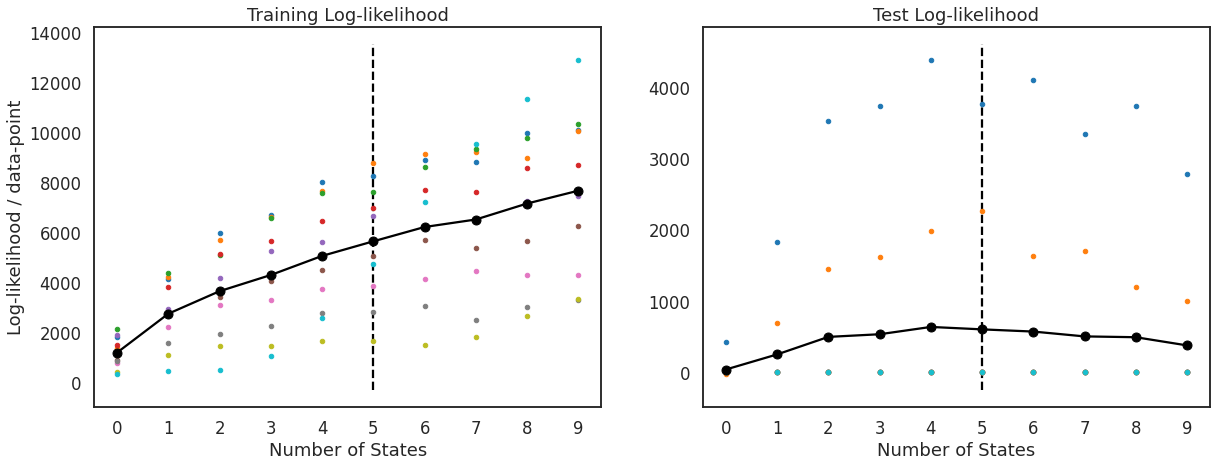

In [140]:
#Plot the log-likelihood of the training and test datasets

fig, axes = plt.subplots(1,2,figsize=(20,7),sharey=False)

#Training data
axes[0].plot(ll_training,'.')
axes[0].plot(np.mean(ll_training,axis=1),'-ok')
axes[0].set_title('Training Log-likelihood')
axes[0].set_ylabel('Log-likelihood / data-point')

axes[1].plot(ll_heldout,'.')
axes[1].plot(np.mean(ll_heldout,axis=1),'-ok')
axes[1].set_title('Test Log-likelihood')

for ax in axes:
    ax.set_xticks(np.arange(0,ll_training.shape[0]))
    ax.set_xlabel('Number of States')
    ax.vlines(5,*ax.get_ylim(),ls='--',color='k')